In [1]:
import keras
from keras.datasets import cifar10

In [2]:
# load CFAR data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# Print shapes of samples
print("Initial dimensions of sample data :", (x_train.shape))
print("Initial dimensions of labels data:", (y_train.shape))
print("Number of samples in training data :", len(x_train))
print("Number of labels in training data:", len(y_train))
print("Number of samples in testing data:", len(x_test))
print("Number of labels in testing data:",len(y_test))

Initial dimensions of sample data : (50000, 32, 32, 3)
Initial dimensions of labels data: (50000, 1)
Number of samples in training data : 50000
Number of labels in training data: 50000
Number of samples in testing data: 10000
Number of labels in testing data: 10000


# Visualising images using Matplotlib

In [4]:
import matplotlib.pyplot as plt
import numpy as np

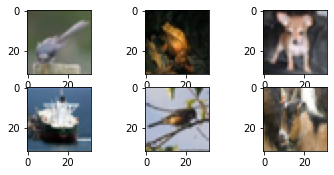

In [5]:
# Plot random 6 images
plt.subplot(331) # subplot argument is nrows, ncols and index
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap= plt.get_cmap("gray"))
plt.subplot(332)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap= plt.get_cmap("gray"))
plt.subplot(333)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap= plt.get_cmap("gray"))
plt.subplot(334)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap= plt.get_cmap("gray"))
plt.subplot(335)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap= plt.get_cmap("gray"))
plt.subplot(336)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap= plt.get_cmap("gray"))
# display all plots
plt.show()

# One hot encoding

In [6]:
# Labels are in the form y_train = [0, 6, 4, 7, 2, 4, 1, 0, 5, 8] which need one hot encoding
# print number of classes of labels available in labels data
num_classes = y_test.shape[1]
print("Number of classes:"+str(num_classes))

Number of classes:1


In [7]:
#from keras.utils import to_categorical
# one hot encode the label outputs
#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)

# Reshaping the input according to keras

In [8]:
# keras accepts the input in form of number of samples, Rows, Columns, Depth
# initial reshaping is not neccesary in this case as data is in reshaped format i.e data for train is 50000, 32, 32, 3
print("Shape of train samples :", x_train.shape)

Shape of train samples : (50000, 32, 32, 3)


In [9]:
# Change the image type to fload32
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

In [10]:
# Normalise the images from (0 to 255) to (0 to 1)
x_train = x_train/255.0
x_test = x_test/255.0

# Create the Model

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [12]:
# import optimiser
from keras.optimizers import RMSprop
opt = RMSprop(lr = 0.0001, decay = 1e-6)

In [13]:
# create model
model = Sequential ()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# compile the model
model.compile(loss = "categorical_crossentropy", optimizer = opt, metrics = ["accuracy"])

# Print model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

# Train the model

In [15]:
batch_size = 32
epochs = 10
# verbose shows how much information we want to see during fitting...generally verbose = 1 
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test), verbose =0)
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose =1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

313/313 [==============================] - 4s 13ms/step - loss: 0.0000e+00 - accuracy: 0.1000
Test loss: 0.0
Test accuracy: 0.10000000149011612
